<a href="https://colab.research.google.com/github/gould-ann/ml_workshop/blob/master/ml_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop

## Predicting Death from Coronavirus in Hubei (close to Wuhan)

Hi! Welcome to SELC's Machine Learning Workshop. Today we will be using Python (and Python libraries Matplotlib, pandas, Sklearn and Jupyter Notebook kind of) to explore data and create models for predicting deaths from COVID-19.

### Typical Steps in creating a model in machine learning:

Below are some very grossly oversimplified steps in creating a model from a dataset. This is a very light introduction to machine learning. Utilizing machine learning uses a lot of Software Engineering concepts, but it's also important "thinking like a data scientist". Machine learning also utilizies a lot of math and statistics, so there's a potential for a lot of overhead if data science principles are neglected.

1. Retrieve data set that represents something that you are trying to find.

  https://kaggle.com is a great tool for this. Aim for a ```.csv``` file :)

  Great examples for beginners:

  - something that can be found with a linear regressor (simple)

  - something binary (is it a tumor or is it not a tumor?)

2. *Typically* cleaning the data. 
  
  This helps us create a more presentable way to use our data. This is typically done with pandas, but can also be done by scratch.

3. **Visualize** the data. This is done with Matplotlib/Seaborn typically and helps us analyze what kinds of predictions we might be able to make with our data. If you don't really know what the data means, that's okay for this workshop.

  Classes to take if you think this is cool and you want to do more with this: 

  - Data Science Minor:
    
    - DS 201, DS 202, DS 301

    - Good for more "statistical"/"applied" approach
  
  - COM S Electives
    
    - COM S 474 (counts as supplemental elective for SE!)

  Other ways to learn ML:

    - https://coursera.org

    - Articles from smart graduate students on https://medium.com/ or from people who are genuinely curious and use ML to predict something cool.

4. Use a model. 

  Based on what data you can see through visualizations, typically we can get a feel for what we can/can't predict with our data.

In [0]:
# import statements 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# PART 1: GETTING THE DATA... Here we are putting our data into a Pandas Dataframe
df = pd.read_csv("2019_nCoV_data.csv")

One unique aspect of Google Collab/Jupyter Notebooks are that we can run specific sections of code at a time. 

This is nice for data analysis as sometimes processing datasets can take a long time. Segmenting this out can help save us time.

In [108]:
# PART 2: CLEANING THE DATA (uses pandas)
# print column names 
# print(df.head)

'''
if we look at our data a lot of columns are NaN (left empty). By cleaning our 
data (replacing empty columns with 0's) this makes our data more usable.
'''
df = df.fillna(0)

'''
For the purpose of this workshop, we want to observe and predict what is
happening in Hubei, which is the epicenter of the outbreak.

This dataset was last updated on 2/5/2020.
'''

df_hubei = df.loc[df['Province/State'] == "Hubei"]
df_hubei = df_hubei.sort_values('Last Update')
# print(df_hubei)
print(df_hubei)

Empty DataFrame
Columns: [Province/State, Country/Region, Last Update, Confirmed, Suspected, Recovered, Death]
Index: []


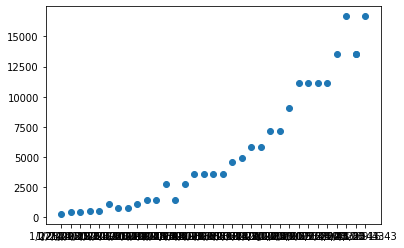

           Confirmed  Suspected  Recovered     Death
Confirmed   1.000000  -0.184532   0.985874  0.995979
Suspected  -0.184532   1.000000  -0.176369 -0.216935
Recovered   0.985874  -0.176369   1.000000  0.973368
Death       0.995979  -0.216935   0.973368  1.000000


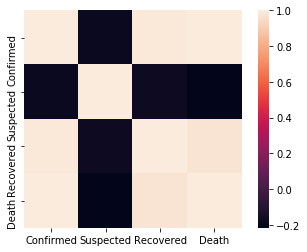

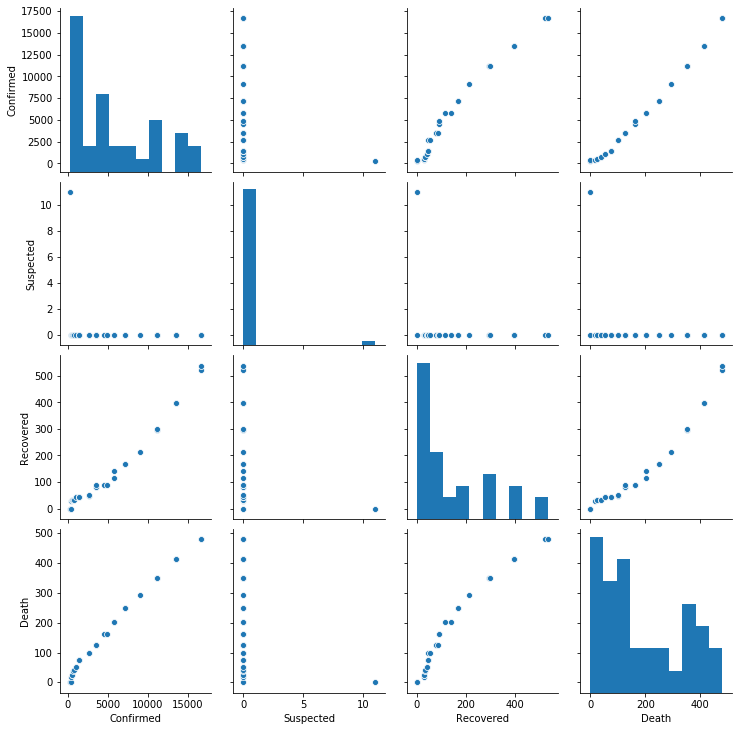

In [62]:
# PART 3: VISUALIZATIONS
'''
In this example, we are just going to use our df_hubei data, but feel free to 
explore the original dataset on your own time!
'''

plt.scatter(df_hubei["Last Update"], df_hubei["Confirmed"])
plt.show()
# There's a way to make the x-axis not look so bad, but I can't remember it
# right now :(

# Example of another plot: finding correlations through correlation matrixs
my_corr = df_hubei.corr()
print(my_corr)
sns.heatmap(data=my_corr,square=True)

# pairplots: help w general correlations
sns.pairplot(df_hubei)

In [0]:
# PART 4: MODELING AND ASSESSING MODELS

'''
If we look at our first plot, it looks like an exponential curve... 

We can use a linear regression using sklearn to create a model to predict # of
confirmed cases of COVID-19.
'''
# we can use n different predictors actually, but for the sake of this,
# we're just going to use our time predictor
x = df_hubei[['Last Update', 'Confirmed']] # Independent Varible/Predictor 
y = df_hubei['Death'] # Dependent Variable/Response

# pandas can generate dummy data for our model
x = pd.get_dummies(data=x)
# split our data up 
# 80% of our data our model can use to learn (think of it like studying for an exam)
# 20% of our data is the "test" itself (how accurate is our predictor?)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 100)

           predicted    y_test
predicted   1.000000  0.988008
y_test      0.988008  1.000000
Mean Squared Error: 2592.748571428572
Variance: 0.9257667699333771


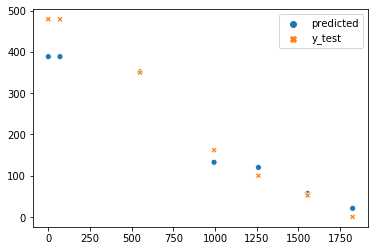

In [99]:
# KNN TRIAL

knn = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = 'uniform')
knn.fit(x_train, y_train)

# actual predicted data!!
predicted = knn.predict(x_test)

residual = y_test - predicted
predict_df = pd.DataFrame({'predicted': predicted, 'y_test': y_test})
print(predict_df.corr())

# mean squared error
# tells about how close the regression line is to a set of points... 
# in this case (I'm assuming) not really but we'll see
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error:",mse)
print("Variance:" , r2_score(y_test,predicted))
predict_knn = pd.DataFrame({'predicted': predicted, 'y_test': y_test})
sns.scatterplot(data=predict_knn)


<class 'pandas.core.frame.DataFrame'>


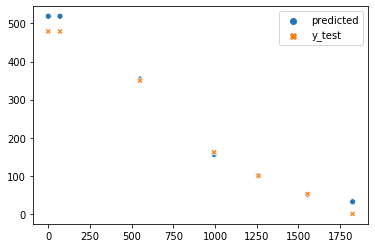

In [105]:
# linear Regression

linear = LinearRegression()
linear.fit(x_train, y_train)
print(x_test[])
predicted = linear.predict(x_test)

predict_linear = pd.DataFrame({'predicted': predicted, 'y_test': y_test})
sns.scatterplot(data=predict_linear)

Now what?

Let's try seeing if this is accurate to what is happening today*

ALSO:

When creating models, make sure to watch out for overfitting:

Overfitting is when your model is "too accurate" with what is provided, which makes it unreliable to predict future results as accurately.

In [107]:
print(type(df_hubei))

dt = "2/13/20 16:43"
cases = 14,840
self_guess = pd.DataFrame({'Last Update': predicted, 'Confirmed': cases})
guess = linear.predict(self_guess)
print(guess)


ValueError: ignored